In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import ifft
import scipy.signal.windows as ws
from scipy.signal import freqz

## Definición de datos


In [110]:
fm = 300 #frecuncia de muestreo
fr = 50 # frecuencia de corte

N = 11 # longitud del filtro deseado
M = 10*N # longitud de la respueste en frecuencia deseada  para frecuencias positivas
Mtot = 2 * M + 1 # M para frecuencias +, M para frecuencias - y una para frecuencia 0

df=fm/(Mtot) # delta para la resolución frecuencial



## Construcción de la respuesta de magnitud

(47.0, 53.0)

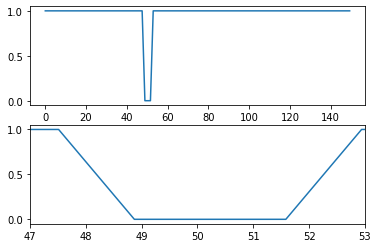

In [111]:
MD = np.ones(M+1) #Modulo de la frecuencia. Las positivas y la cero
nr = int(fr/df) + 1  #indice donde se encuentra la frecuencia que se quiere cortar

#como no se puede hacer abruptamente, se pone un intervalo de corte
# a continución hacemos un ancho de 2(hz) para el intervalo de corte, alrededor de la fr
nm = int(np.ceil(2/df))

# poner en cero el intervalor alrededor de la frecuencia de corte
MD[nr-nm + 1:nr+nm] = 0

ax1 = plt.subplot(211)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(np.arange(fm/2 , step=df), MD)

ax3 = plt.subplot(212)
#ax3.marghns(x=-.25, y=0)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(np.arange(fm/2 , step=df), MD)
ax3.set_xlim(47, 53)

### Construcción del retardo
Retardar la señal para que la parte negativa empiece desde el cero, así es una señal causal. Se utiliza la propiedad "3. Desplazamiento temporal (retardo)" del libro

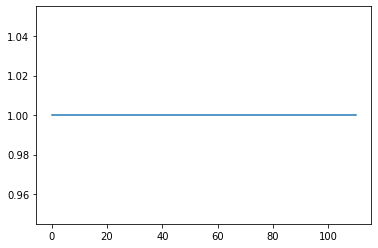

In [112]:
retardo = (N-1)/2 # esto funciona bien cuando N es impar
ph = np.exp(-1j * 2 * np.pi * retardo * np.arange(M+1) / Mtot) # señal de retado
plt.plot(np.abs(ph))

R = MD * ph #agrego el retardo a la señal

### agregar las frecuencias negativas

las frecuencias negativas es la simetria de la positivas(un espejo) por lo tanto se concatenan las positivas y el conjugado(inverso) de éstas pero se recorren al revers

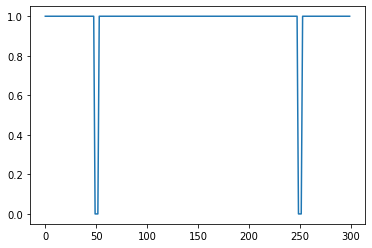

In [113]:
RN = np.flip(R[1::]).conjugate() # no se tiene en cuenta la frecuncia 0 xq ya está en las positivas
R = np.concatenate((R, RN) )
#es fm-df/2 por que la frq negativa no tien -150 si haces - df solamente no tien een cuenta la ultima tampoco
plt.plot(np.arange(fm-df/2, step=df), np.abs(R)) 


### trasformada inversa
como ya tengo la señal lo úncio que debo hacer, es aplicar la fft inversa para obtener el filtro en el tiempo

(0.0, 10.0)

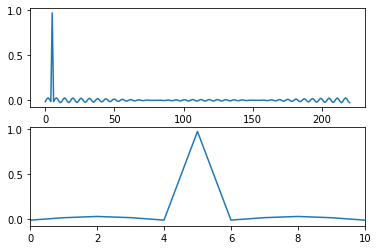

In [114]:
h = np.real(ifft(R))

ax1 = plt.subplot(211)
ax1.plot(h)

ax2 = plt.subplot(212)
ax2.plot(h)
ax2.set_xlim(retardo-5, retardo+5)

se optuvo algo similar al la sinc pero está corrida, el pulso se da en el retraso puesto

## Ventaneo
obtengo las N primeras muestras y luego aplico la ventana.
Para ver el resultado, analizo su respueststa en frecuencia

### ventana cuadrada

<StemContainer object of 3 artists>

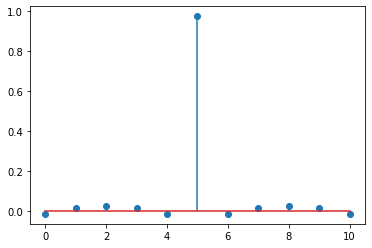

In [115]:
hf = h[:N] * ws.boxcar(N)
plt.stem(hf)


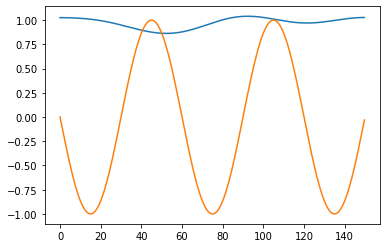

In [116]:
#respuesta en frecuencia 
#es un filtro fir por lo tanto no tiene, denomiador
# todos los valores de hf son los coeficientes del numerador

w, h = freqz(hf, fs= fm)
plt.plot(w, np.abs(h))

plt.plot(w, np.sin(np.angle(h)))


